# Anime Recommender

Haoyuan Wang

Andy Thai

In [1]:
# Import statements
import csv
from pprint import pprint
from collections import defaultdict
import pandas as pd 
import numpy as np
from sklearn import linear_model
from sklearn import svm

In [5]:
# Read in input csvs
df = pd.read_table("anime.csv", sep=",")
us = pd.read_table("rating.csv", sep=",")

In [6]:
# Initialize variables
animeList = {}                    # Anime and their data
genreList = defaultdict(list)     # Animes sorted by genre
userList = defaultdict(list)      # User's list of anime and rating in a (anime_id,rating) structure
userRating = defaultdict(list)    # User's rating
userCategory = defaultdict(set)   # User's list of categories they have watched

## Set up dictionary data structures

In [7]:
# To get data from animeList. dictionary = animeList['id']['data']
def getData(dictionary):
    if not dictionary.isnull().values[0]:
        return dictionary.values[0]
    else:
        return 0

In [8]:
# Get category data from getData
def getCategory(data):
    cat=[]
    if data:
        for x in data.split(', '):
            cat.append(x)
    return cat

In [9]:
# Compile the animeList and genreList
for index, row in df.iterrows():
    animeList[row['anime_id']]=df.loc[[index]]
    if not df.loc[[index]]['genre'].isnull().values[0]:
        for x in row['genre'].split(', '):
            genreList[x].append(row['anime_id'])

In [ ]:
# Compile the userList and userRating list
for index, row in us.iterrows():
    userList[row['user_id']].append(row['anime_id'])
    if row['rating'] != -1:
        userRating[row['user_id']].append(row['rating'])

In [ ]:
# Compile the user category list (do not need to run this, very long)
for index, row in us.iterrows():
    if int(row['anime_id']) in animeList:
        catList= getCategory(getData(animeList[int(row['anime_id'])]['genre']))
        for x in catList:
            userCategory[row['user_id']].add(x)

In [ ]:
# Average rating per user including -1 for no review
averageUser = defaultdict(float)
stdUser = defaultdict(float)
for key in userRating:
    averageUser[key] = np.mean(userRating[key])
    stdUser[key] = np.std(userRating[key])

## Basic Statistics about Dataset

In [63]:
# Get mean and standard deviation 
mean_ratings = {}
std_ratings = {}
total_list=[]
genres = genreList.keys()
for genre in genres:
    animeIDs = genreList[genre]
    avg_list = []
    for anime in animeIDs:
        avg_list.append(int(getData(animeList[anime]['rating'])))
        total_list.append(int(getData(animeList[anime]['rating'])))
    
    mean_ratings[genre] = np.mean(avg_list)
    std_ratings[genre] = np.std(avg_list)

In [64]:
print(np.mean(total_list))

6.11883698498


In [53]:
# Mean
pprint(mean_ratings)

{'Action': 6.1363796133567661,
 'Adventure': 6.1771720613287906,
 'Cars': 5.958333333333333,
 'Comedy': 6.0508073196986008,
 'Dementia': 4.5041666666666664,
 'Demons': 6.0374149659863949,
 'Drama': 6.3908730158730158,
 'Ecchi': 6.0910518053375196,
 'Fantasy': 6.0134257254222607,
 'Game': 6.2320441988950277,
 'Harem': 6.381703470031546,
 'Hentai': 5.6371603856266432,
 'Historical': 6.2270471464019854,
 'Horror': 5.8644986449864502,
 'Josei': 6.666666666666667,
 'Kids': 5.6314481044126783,
 'Magic': 6.0552699228791775,
 'Martial Arts': 6.3094339622641513,
 'Mecha': 6.0688559322033901,
 'Military': 6.352112676056338,
 'Music': 5.3360465116279068,
 'Mystery': 6.6141414141414145,
 'Parody': 5.9779411764705879,
 'Police': 6.563451776649746,
 'Psychological': 6.462882096069869,
 'Romance': 6.3879781420765029,
 'Samurai': 6.3040540540540544,
 'School': 6.2459016393442619,
 'Sci-Fi': 6.1251207729468602,
 'Seinen': 6.3016453382084094,
 'Shoujo': 6.2951907131011611,
 'Shoujo Ai': 6.36363636363636

In [54]:
# Standard deviation 
pprint(std_ratings)

{'Action': 1.4081216483159718,
 'Adventure': 1.1612527055011501,
 'Cars': 1.1718634258687692,
 'Comedy': 1.2650820565506755,
 'Dementia': 1.2681939805180527,
 'Demons': 1.3931177233344414,
 'Drama': 1.2739748569952172,
 'Ecchi': 1.0577656283292451,
 'Fantasy': 1.391458165422288,
 'Game': 1.3007735557545461,
 'Harem': 0.98380238347728799,
 'Hentai': 0.89686590325529569,
 'Historical': 1.2290176291513517,
 'Horror': 1.3844127752888544,
 'Josei': 1.5634719199411433,
 'Kids': 1.1598334479768275,
 'Magic': 1.4871443076995354,
 'Martial Arts': 1.0105601194748286,
 'Mecha': 1.2075523133239245,
 'Military': 1.319039964754162,
 'Music': 1.3859270082710968,
 'Mystery': 1.3005834045240054,
 'Parody': 1.2860502218072125,
 'Police': 1.057861200130007,
 'Psychological': 1.3970250641154531,
 'Romance': 1.2049614009022478,
 'Samurai': 1.3539670630739029,
 'School': 1.4582241356079126,
 'Sci-Fi': 1.2143652483616236,
 'Seinen': 1.3730419125407065,
 'Shoujo': 1.1237346324462876,
 'Shoujo Ai': 1.149919149

## Baseline Code

## Create Feature Vectors (Genre One-hot Encoding)

In [ ]:
# Compile the feature vector by using one-hot encoding for genres
genreOrder = sorted(genreList.keys())
feat = []
for index, row in us.iterrows():
    temp = []
    if int(row['anime_id']) in animeList:
        catList = getCategory(getData(animeList[int(row['anime_id'])]['genre']))
    for x in genreOrder:
        if x in catList:
            temp.append(1)
        else:
            temp.append(0)
    feat.append(temp)

In [ ]:
# Create X feature and Y feature
# X = one hot encoding genres
# Y = Rating by user for each anime (including -1)
X_featureSet = feat
Y_featureSet = [row['rating'] for index,row in us.iterrows()]

In [ ]:
len(X_featureSet) / 3

In [ ]:
# I gave up running this. It never finished.... I am not sure whether prediction rating by genre is a good idea. 
# Test on validation set
lam = [0.01, 0.1, 1, 10]

# Calculate accuracy
def difference(pred,act):
    correct = 0
    
    for i in range(0, len(pred)):
        if pred[i] == act[i]:
            correct = correct + 1
    return float(correct) / len(pred)
    
# Run linear SVM
clf = svm.LinearSVC(C=1)
clf.fit(X_featureSet[:int(len(X_featureSet) / 10)], Y_featureSet[:int(len(Y_featureSet) / 10)])

valid_predictions = clf.predict(X_featureSet[int(len(X_featureSet) / 3):int(2 * len(X_featureSet) / 3)])
print("lambda = " + str(l) + ":\taccuracy_valid=" + str(difference(valid_predictions, Y_featureSet[int(len(Y_featureSet) / 3):int(2 * len(Y_featureSet) / 3)])))

## Cosine Similarity Calculations

In [10]:
from scipy.spatial.distance import cosine

In [11]:
# Cosine similarity between animes
genereList = sorted(genreList.keys())

animeFeatureList = []
for key in animeList:
    temp = []
    catList = getCategory(getData(animeList[key]['genre']))
    for x in genreList:
        if x in catList:
            temp.append(1)
        else:
            temp.append(0)
    animeFeatureList.append((key,temp))

In [12]:
animeFeatureList = [(x,y) for x , y in animeFeatureList if 1 in y]

In [13]:
# Create cosine datastructure
cosine_anime=defaultdict(list)
temp=defaultdict(list)
percentage =0.1
for i in range(0,int(len(animeFeatureList))):
    if i == int(len(animeFeatureList)*percentage):
        pprint(percentage)
        percentage+=0.10
    for j in range(i,int(len(animeFeatureList))):
        if animeFeatureList[i][0] != animeFeatureList[j][0]:
            temp[animeFeatureList[i][0]].append((animeFeatureList[j][0],1-cosine(animeFeatureList[i][1],animeFeatureList[j][1])))
            temp[animeFeatureList[j][0]].append((animeFeatureList[i][0],1-cosine(animeFeatureList[i][1],animeFeatureList[j][1])))

    cosine_anime[animeFeatureList[i][0]]=sorted(temp[animeFeatureList[i][0]],key=lambda x : x[1], reverse=True)[:10]
    temp[animeFeatureList[i][0]]=[]

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999


In [ ]:
temp=[]

In [14]:
for key in cosine_anime:
    if len(cosine_anime[key])<10:
        pprint((key,cosine_anime[key]))

In [ ]:
for x, y in cosine_anime.items():
    print(x,y)
    break

In [15]:
# Write to file
with open('E:/anime_cosine_sim.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['anime_id','top 10 cosine similarities'])
    for key, value in cosine_anime.items():
        writer.writerow([key, value])

In [16]:
# Read in saved anime cosine csv
cos_sim_csv = pd.read_table("E:/anime_cosine_sim.csv", sep=",")

In [17]:
cos_sim_csv

,anime_id,top 10 cosine similarities
0,32281,"[(547, 1.0), (546, 1.0), (14669, 0.89442719099..."
1,5114,"[(121, 0.93541434669348522), (9135, 0.93541434..."
2,28977,"[(9969, 0.99999999999999989), (15335, 0.999999..."
3,9253,"[(11577, 0.99999999999999978), (10863, 0.99999..."
4,9969,"[(28977, 0.99999999999999989), (15335, 0.99999..."
5,32935,"[(28891, 0.99999999999999978), (20583, 0.99999..."
6,11061,"[(136, 1.0), (137, 1.0), (139, 1.0), (138, 1.0..."
7,820,"[(3665, 1.0), (342, 1.0), (711, 1.0), (11307, ..."
8,15335,"[(28977, 0.99999999999999989), (9969, 0.999999..."
9,15417,"[(28977, 0.99999999999999989), (9969, 0.999999..."


In [18]:
def getCosineSim(dataList):
    cosineList=[]
    dataList=dataList.replace(" ","")
    dataList=dataList.replace("(","")
    if '),' in dataList:
        parsed_data=dataList[1:len(dataList)-1].split("),")
        format_data=map((lambda x :x.split(',')),parsed_data)
        data=list(format_data)
        data[len(data)-1][1]=data[len(data)-1][1].replace(")","")
    else:
        dataList=dataList.replace(")","")
        dataList=dataList.replace("[","")
        dataList=dataList.replace("]","")
        data=[dataList.split(",")]
    return data

In [19]:
cosine_sim_table=defaultdict(list)
for key, row in cos_sim_csv.iterrows():
    data_list=getCosineSim(row['top 10 cosine similarities'])
    for data in data_list:
        cosine_sim_table[row['anime_id']].append((int(data[0]),float(data[1])))
    

In [ ]:
cosine_sim_table

In [ ]:
anime_list = pd.read_table("anime.csv", sep=",")
user_list= pd.read_table("rating.csv", sep=",", dtype = int)

R_df=pd.pivot_table(user_list,values='rating',index='user_id',columns='anime_id').fillna(-1)

R = R_df.as_matrix()

user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

from scipy.sparse.linalg import svds

U, sigma, Vt = svds(R_demeaned, k = 50)

sigma = np.diag(sigma)

all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)


def recommend_movies(predictions_df, userID, movies_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.UserID == (userID)]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'anime_id', right_on = 'anime_id').
                     sort_values(['rating'], ascending=False)
                 )

    print 'User {0} has already rated {1} animes.'.format(userID, user_full.shape[0])
    print 'Recommending the highest {0} predicted ratings animes not already rated.'.format(num_recommendations)
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies_df[~movies_df['anime_id'].isin(user_full['anime_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'anime_id',
               right_on = 'anime_id').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

already_rated, predictions = recommend_movies(preds_df, 837, anime_list, user_list, 10)

## Dataset Creation & Scrambler

In [179]:
user_data_scrambled=us.sample(frac=1).reset_index(drop=True)

In [180]:
train_data=defaultdict(list)
validation_data=defaultdict(list)
for index, row in user_data_scrambled.iterrows():
    if index < (len(user_data_scrambled)/2):
        train_data[row['user_id']].append((row['anime_id'],row['rating']))
    else:
        validation_data[row['user_id']].append((row['anime_id'],row['rating']))

In [181]:
train_data_sorted=defaultdict(list)
for x in train_data:
    train_data_sorted[x]=sorted(train_data[x],key=lambda x : x[1],reverse=True)

## Test set prediction

In [182]:
result = defaultdict(list)
for key in train_data_sorted:
    for i in range(0, 5):
        animeID_length = len(train_data_sorted[key])
        if animeID_length > i:
            animeID = train_data_sorted[key][i][0]
            if animeID in cosine_sim_table:
                first_two = cosine_sim_table[animeID][:2]
                result[key].append([x[0] for x in first_two])

In [183]:
def comparisonInValid(animeId,user):
    for x in validation_data[user]:
        if animeId==x[0]:
            return True

In [184]:
correct_pred=0
found_movie=False
for user in result:
    for recs in result[user]:
        for x in recs:
            if comparisonInValid(x,user):
                correct_pred+=1
                found_movie=True
                break
        if found_movie:
            found_movie=False
            break

In [185]:
print(correct_pred/len(result))

0.5619284655611175


## Basis Calculation

In [143]:
# Stays constant, no need to rerun
genrePop=defaultdict(list)
for index, row in df.iterrows():
    if not df.loc[[index]]['genre'].isnull().values[0]:
        for x in row['genre'].split(', '):
            genrePop[x].append((row['anime_id'],row['rating']))

In [144]:
# Stays constant, no need to rerun
genrePop_sorted=defaultdict(list)
for key in genrePop:
    genrePop_sorted[key]=sorted(genrePop[key],key=lambda x : x[1], reverse=True)

In [165]:
train_data_genre=defaultdict(list)
for key in train_data_sorted:
    for x,r in train_data_sorted[key]:
        if int(x) in animeList:
            catList= getCategory(getData(animeList[int(x)]['genre']))
            for x in catList:
                train_data_genre[key].append(x)

In [166]:
import collections


In [167]:
prediction_data_genre =defaultdict(list)

for key in train_data_genre:
    counter=collections.Counter(train_data_genre[key])
    prediction_data_genre[key]=counter.most_common(2)


In [168]:
prediction_data=defaultdict(list)

for key in prediction_data_genre:
    for i in range(0,5):
        if len(prediction_data_genre[key])>0:
            prediction_data[key].append(genrePop_sorted[prediction_data_genre[key][0][0]][i][0])
        if len(prediction_data_genre[key])>1:
            prediction_data[key].append(genrePop_sorted[prediction_data_genre[key][1][0]][i][0])

In [169]:
def comparisonInValid(animeId,user):
    for x in validation_data[user]:
        if animeId==x[0]:
            return True

In [170]:
correct_pred_basis=0
for user in prediction_data:
    for recs in prediction_data[user]:
        if comparisonInValid(recs,user):
            correct_pred_basis+=1
            break


In [171]:
print(correct_pred_basis/len(prediction_data))

0.30719584258832405


## Plot results vs baseline

In [186]:
import matplotlib.pyplot as plt

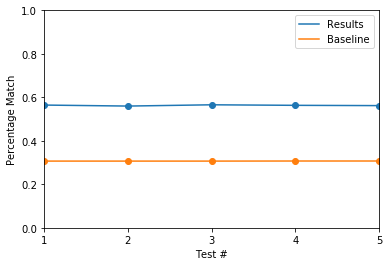

In [212]:
REC_RESULTS = [0.564464265742087, 
               0.5598565007398308, 
               0.5657113312745413, 
               0.5632301157006316,
               0.5619284655611175]

BASELINE_RESULTS = [0.30680658999762445, 
                    0.30674204355108875, 
                    0.30676439790575916, 
                    0.3071615147155369, 
                    0.30719584258832405]

TEST_NUM = [1, 2, 3, 4, 5]

plt.clf()
plt.plot(TEST_NUM, REC_RESULTS, label='Results')
plt.scatter(TEST_NUM, REC_RESULTS)
plt.plot(TEST_NUM, BASELINE_RESULTS, label='Baseline')
plt.scatter(TEST_NUM, BASELINE_RESULTS)
plt.legend()
plt.xlim([1, 5])
plt.ylim([0, 1])
plt.xticks([1, 2, 3, 4, 5])
plt.xlabel('Test #')
plt.ylabel('Percentage Match')
plt.show()
plt.clf()

**Relevant research article:**

http://jill-jenn.net/_static/works/mangaki-recsys2015.pdf 